# OMDENA X CREEDIX

### DATA PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from helper import reduce_mem_usage

transaction_df = pd.read_excel('../data/TRANSACTION DATA OF BANK X_OCT DES 2019.xlsx')
customer_df = pd.read_excel('../data/CUSTOMER BANK X.xlsx')

In [3]:
transaction_df, _ = reduce_mem_usage(transaction_df)
customer_df, _ = reduce_mem_usage(customer_df)
transaction_df['TRX_DATE'] = pd.to_datetime(transaction_df['TRX_DATE'])
transaction_df['MONTH'] = pd.DatetimeIndex(transaction_df['TRX_DATE']).month
transaction_df['DAY'] = pd.DatetimeIndex(transaction_df['TRX_DATE']).day

Memory usage of properties dataframe is : 105.79487609863281  MB
******************************
Column:  CIF_NO
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  ACCOUNT_NO
dtype before:  int64
dtype after:  uint64
******************************
******************************
Column:  AMT_TRX
dtype before:  float64
dtype after:  float32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  99.18270111083984  MB
This is  93.75000450718575 % of the initial size
Memory usage of properties dataframe is : 0.2614288330078125  MB
******************************
Column:  CIF_NO
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  ACCT_NO
dtype before:  int64
dtype after:  uint64
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  0.228759765625  MB
This is  87.50364793089359 % of the initial size


In [128]:
transaction_df.drop(labels=['ISSUER','STATUS'], axis=1, inplace=True)

### Region Analysis

Some ideas to analyze regions:
- Average rental cost per region
    - https://www.numbeo.com/property-investment/

In [16]:
def remove_suffix(df):
    for col in df:
        df[col] = df[col].str.replace('(AREA|REGION)\s','')
    return df
transaction_df[['AREA_ACCOUNT','REGION_ACCOUNT']] = remove_suffix(transaction_df[['AREA_ACCOUNT','REGION_ACCOUNT']])
transaction_df

C:\Users\Jun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,BALIKPAPAN,VII/ BANJARMASIN,670000.0
1,75227151,2019-10-09,FT192827FX5M;1,16:05,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,BALIKPAPAN,VII/ BANJARMASIN,20000.0
2,75227151,2019-10-25,FT19298TCCWJ;1,20:31,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,BALIKPAPAN,VII/ BANJARMASIN,186000.0
3,75227151,2019-10-08,FT19281B8Y42;1,19:21,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,BALIKPAPAN,VII/ BANJARMASIN,70000.0
4,75227151,2019-10-09,FT19282XLLMN;1,07:28,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,BALIKPAPAN,VII/ BANJARMASIN,40000.0
5,74764783,2019-11-12,FT19316801PW;1,20:32,7043471374,00830012,PURCHASE BANKX - PRIMA NPG,EDC PRIMA,CARD,PURCHASE,PURCHASE,BANKX CARD,YES,TANGERANG,III/ JAKARTA,95033.0
6,74764783,2019-11-12,FT193164MNS9;1,16:47,7043471374,00830012,PURCHASE BANKX - PRIMA NPG,EDC PRIMA,CARD,PURCHASE,PURCHASE,BANKX CARD,YES,TANGERANG,III/ JAKARTA,352120.0
7,74764783,2019-11-09,FT193135L28R;1,11:56,7043471374,MPSOVO1,OVO,MOBILE,MOBILE,PAYMENT,PAYMENT OVO,NaN,YES,TANGERANG,III/ JAKARTA,98900.0
8,74764783,2019-11-01,FT193051RN1Z;1,20:26,7043471374,MPSOVO1,OVO,MOBILE,MOBILE,PAYMENT,PAYMENT OVO,NaN,YES,TANGERANG,III/ JAKARTA,168900.0
9,74764783,2019-10-12,FT19285DH21K;1,07:54,7043471374,MPSOVO1,OVO,MOBILE,MOBILE,PAYMENT,PAYMENT OVO,NaN,YES,TANGERANG,III/ JAKARTA,18900.0


In [58]:
transaction_df[['AREA_ACCOUNT','REGION_ACCOUNT','AMT_TRX','CIF_NO']]\
.groupby(['REGION_ACCOUNT','AREA_ACCOUNT'])\
.agg({'AMT_TRX': [
    ('TRX_COUNT', 'count'),
    ('TRX_SUM', 'sum')],
      'CIF_NO': [
    ('CIF_UNIQUE_COUNT', lambda x: len(set(x)))]
     })

AMT_TRX                \
                                       TRX_COUNT       TRX_SUM   
REGION_ACCOUNT   AREA_ACCOUNT                                    
I/ MEDAN         ACEH                      22688  1.486818e+10   
                 BATAM                     13986  8.819047e+09   
                 MEDAN KOTA                22776  1.337296e+10   
                 MEDAN RAYA                12586  7.951618e+09   
                 PEKANBARU                 28081  1.306162e+10   
                 PEMATANGSIANTAR           17372  1.139087e+10   
II/ PALEMBANG    BANDAR LAMPUNG            15776  1.333279e+10   
                 JAMBI                     14198  8.188231e+09   
                 PADANG                    21889  1.458790e+10   
                 PALEMBANG                 20547  1.140154e+10   
III/ JAKARTA     BEKASI                    24310  1.386611e+10   
                 BOGOR                     32539  1.902358e+10   
                 JAKARTA KEBON JERUK       20721  1.223920e+10   
                 JAKARTA KELAPA GADING     27117  1.651420e+10   
                 JAKARTA MAYESTIK          40356  2.874079e+10   
                 JAKARTA THAMRIN          121564  8.544018e+10   
                 JAKARTA WARUNG BUNCIT     26305  1.563108e+10   
                 TANGERANG                 28318  1.621499e+10   
IV/ BANDUNG      BANDUNG KOTA              28842  1.588657e+10   
                 BANDUNG RAYA              22761  1.234105e+10   
                 CIREBON                   18853  8.632017e+09   
V/ SEMARANG      SEMARANG                  30423  1.784474e+10   
                 SOLO                      16936  9.522608e+09   
                 YOGYAKARTA                28498  1.601116e+10   
VI/ SURABAYA     DENPASAR                  18156  1.101253e+10   
                 JEMBER                     9789  6.879332e+09   
                 MALANG                    21037  1.232172e+10   
                 SURABAYA KOTA             26142  1.667716e+10   
                 SURABAYA RAYA             14926  1.087683e+10   
VII/ BANJARMASIN BALIKPAPAN                19833  1.155907e+10   
                 BANJARMASIN               21339  1.328336e+10   
                 PONTIANAK                 14854  9.270211e+09   
VIII/ MAKASSAR   JAYAPURA                   5609  4.084730e+09   
                 MAKASSAR                  32752  1.793597e+10   
                 PALU                      24792  1.550149e+10   

                                                 CIF_NO  
                                       CIF_UNIQUE_COUNT  
REGION_ACCOUNT   AREA_ACCOUNT                            
I/ MEDAN         ACEH                               259  
                 BATAM                              159  
                 MEDAN KOTA                         296  
                 MEDAN RAYA                         193  
                 PEKANBARU                          278  
                 PEMATANGSIANTAR                    228  
II/ PALEMBANG    BANDAR LAMPUNG                     184  
                 JAMBI                              168  
                 PADANG                             264  
                 PALEMBANG                          249  
III/ JAKARTA     BEKASI                             299  
                 BOGOR                              406  
                 JAKARTA KEBON JERUK                308  
                 JAKARTA KELAPA GADING              357  
                 JAKARTA MAYESTIK                   476  
                 JAKARTA THAMRIN                   1422  
                 JAKARTA WARUNG BUNCIT              329  
                 TANGERANG                          340  
IV/ BANDUNG      BANDUNG KOTA                       330  
                 BANDUNG RAYA                       294  
                 CIREBON                            220  
V/ SEMARANG      SEMARANG                           380  
                 SOLO                               218  
                 YOGYAKA

In [31]:
TX_details = transaction_df[['DETAIL_CATEGORY','AT_CHG_DESC']].drop_duplicates().sort_values('DETAIL_CATEGORY')
TX_details = TX_details[TX_details.DETAIL_CATEGORY == 'PAYMENT BPI/EDU'].drop_duplicates()
TX_details.AT_CHG_DESC = TX_details.AT_CHG_DESC.str.split(':').str[-1]


### Transaction Categories

Transaction categories might be able give hints on some attributes that the customer have. (e.g. tendency to spend more, income and expenses)

In [79]:
transaction_df[['CATEGORY','DETAIL_CATEGORY']].drop_duplicates().sort_values(['CATEGORY','DETAIL_CATEGORY'])

,CATEGORY,DETAIL_CATEGORY
11,CASH WITHDRAWAL,CASH WITHDRAWAL
341,CEK MUTASI,CEK MUTASI
128,CEK SALDO,CEK SALDO
161,INFAQ,PAYMENT INFAQ
2274,PAYMENT,PAYMENT BPJS
492679,PAYMENT,PAYMENT CBN
28900,PAYMENT,PAYMENT GARUDA
863,PAYMENT,PAYMENT HALO
434,PAYMENT,PAYMENT INDOSAT PAKET DATA
383,PAYMENT,PAYMENT INDOSAT POSTPAID


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-fymr">ORIGINAL CATEGORY</th>
    <th class="tg-fymr">TRANSLATED CATEGORY</th>
  </tr>
  <tr>
    <td class="tg-0pky">CEK SALDO</td>
    <td class="tg-0pky">CHECK BALANCE</td>
  </tr>
  <tr>
    <td class="tg-0pky">INFAQ</td>
    <td class="tg-0pky">?</td>
  </tr>
  <tr>
    <td class="tg-0pky">CEK MUTASI</td>
    <td class="tg-0pky">?</td>
  </tr>
  <tr>
    <td class="tg-0lax">ZAKAT</td>
    <td class="tg-0lax">RELIGIOUS DONATION</td>
  </tr>
  <tr>
    <td class="tg-0lax">PAYMENT BPI/EDU</td>
    <td class="tg-0lax">?</td>
  </tr>
</table>

In [74]:
transaction_df[transaction_df.CATEGORY=='CEK SALDO']

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX
128,79422121,2019-11-21,FT19325HZKYX;1,17:54,7074843207,31810011,CEK SALDO - PRIMA,ATM PRIMA,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,SOLO,V/ SEMARANG,4000.0
916,73547399,2019-11-11,FT193153P4B0;1,07:10,7065128156,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,JAKARTA WARUNG BUNCIT,III/ JAKARTA,2000.0
1651,77329437,2019-10-19,FT19292TLL48;1,23:45,7790051989,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,ACEH,I/ MEDAN,2000.0
1855,73000074,2019-10-21,FT19294J401S;1,20:02,7164701676,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,JAKARTA THAMRIN,III/ JAKARTA,2000.0
2653,76945421,2019-10-30,FT19303T53JT;1,07:56,7260920036,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,JEMBER,VI/ SURABAYA,2000.0
2654,76945421,2019-10-30,FT19303F2BCV;1,07:49,7260920036,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,JEMBER,VI/ SURABAYA,2000.0
2784,74432184,2019-11-27,FT19331WFWB8;1,20:35,7029828352,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,JAKARTA THAMRIN,III/ JAKARTA,2000.0
3407,73318867,2019-10-07,FT19280013K1;1,11:08,7064445196,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,ACEH,I/ MEDAN,2000.0
3751,73265459,2019-11-28,FT193327312V;1,21:39,7011393531,31610011,CEK SALDO - BANKY,ATM BANKY,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,JAKARTA THAMRIN,III/ JAKARTA,2000.0
3752,73510040,2019-11-06,FT193102G629;1,17:34,7871616887,31810011,CEK SALDO - PRIMA,ATM PRIMA,CARD,CEK SALDO,CEK SALDO,BANKX CARD,YES,JAKARTA WARUNG BUNCIT,III/ JAKARTA,4000.0


### Proportion of Students & Religious Person

In [275]:
transaction_df['IS_STUDENT'] = np.where(transaction_df.DETAIL_CATEGORY == 'PAYMENT BPI/EDU', 1, 0)
transaction_df['IS_RELIGIOUS'] = np.where((transaction_df.DETAIL_CATEGORY == 'PAYMENT INFAQ') |
                                          (transaction_df.DETAIL_CATEGORY == 'PAYMENT ZAKAT'), 1, 0)
transaction_df[['CIF_NO','IS_STUDENT','IS_RELIGIOUS']].drop_duplicates().head()

,CIF_NO,IS_STUDENT,IS_RELIGIOUS
0,75227151,0,0
5,74764783,0,0
11,79317435,0,0
13,73026445,0,0
15,79301520,0,0


In [5]:
transaction_df[['REGION_ACCOUNT','AREA_ACCOUNT','CIF_NO','IS_RELIGIOUS','IS_STUDENT']].drop_duplicates()\
.groupby(['REGION_ACCOUNT','AREA_ACCOUNT'])\
.agg({'IS_STUDENT':'sum','IS_RELIGIOUS':'sum','CIF_NO':'count'})\
.rename(columns={'CIF_NO': 'TOTAL_PEOPLE'})
# # .agg({'IS_STUDENT':'sum','IS_RELIGIOUS':'sum'})

### Salary Analysis

Attempt to approximate the salary of each customer.

Idea: Get the difference between the other days and day 25.

For CIF_NO that have NULL values, the imputer strategies ranges from taking averages to using unsupervised learning.

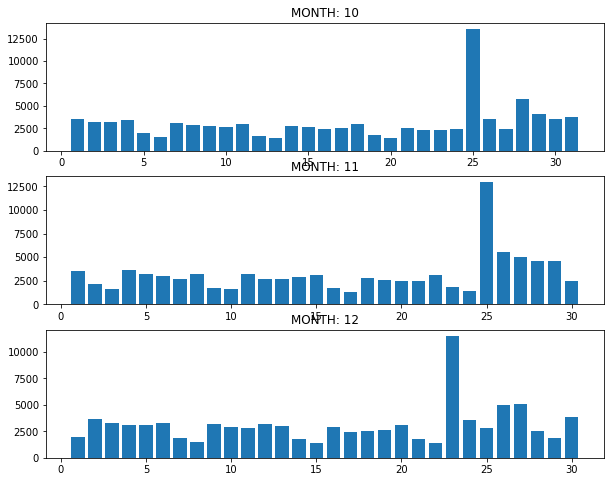

In [156]:
trx_transfer = transaction_df[transaction_df.CATEGORY == 'TRANSFER']\
.groupby(['MONTH', 'DAY'], as_index=False)\
.agg({'AMT_TRX':'count'})

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,8))

for i, month in enumerate(transaction_df.MONTH.unique()):
    axes[i].bar(data=trx_transfer[trx_transfer.MONTH == month], x='DAY',height='AMT_TRX')
    axes[i].set_title(f'MONTH: {month}')


150000.0 1500000.0
AxesSubplot(0.125,0.125;0.775x0.755)


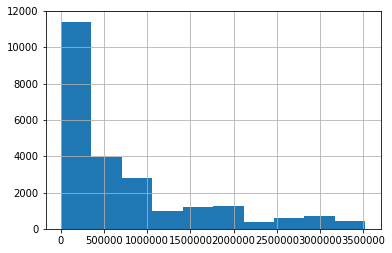

In [186]:
trx_amt = transaction_df[(transaction_df.DAY == 25 )
               & (transaction_df.MONTH.isin([10,11]))
               & (transaction_df.CATEGORY == 'TRANSFER')]\
                ['AMT_TRX']

Q1 = trx_amt.quantile(0.25)
Q3 = trx_amt.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(trx_amt[trx_amt < (Q3 + 1.5 * IQR)].hist())

100000.0 1000000.0
AxesSubplot(0.125,0.125;0.775x0.755)


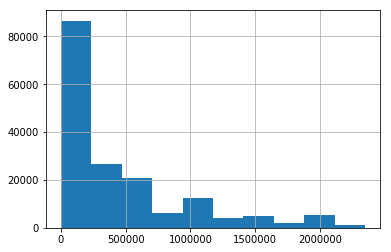

In [187]:
trx_amt = transaction_df[(transaction_df.MONTH.isin([10,11]))
               & (transaction_df.CATEGORY == 'TRANSFER')]\
                ['AMT_TRX']

Q1 = trx_amt.quantile(0.25)
Q3 = trx_amt.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(trx_amt[trx_amt < (Q3 + 1.5 * IQR)].hist())

In [287]:
transaction_df[(transaction_df.DAY == 25 )
               & (transaction_df.MONTH.isin([10,11]))
               & (transaction_df.CATEGORY == 'TRANSFER')]\
.groupby(['CIF_NO','AMT_TRX'], as_index=False)['TRX_DATE']\
.count().head()

,CIF_NO,AMT_TRX,TRX_DATE
0,73000006,4500000.0,1
1,73000006,5000000.0,1
2,73000006,5180000.0,1
3,73000006,12000000.0,1
4,73000006,12500000.0,1


#### Positive Cashflow
I would like to understand whether there are positive cashflow being shown in the account.

CIF_NO that have STD_DEV > 0, means there are changes in balances.

In [272]:
check_balances = transaction_df[transaction_df.CATEGORY == 'CEK SALDO']\
                .groupby(['CIF_NO','MONTH'], as_index=False)\
                .agg({'AMT_TRX':'count'})\
                .query('AMT_TRX > 1')\
                .sort_values('AMT_TRX', ascending=False)\
                .rename(columns={'AMT_TRX':'TRX_COUNT'})

balance_over_once = check_balances.merge(transaction_df[(transaction_df.CATEGORY == 'CEK SALDO')], 
                     on=['CIF_NO','MONTH'], how='inner', suffixes=('','_y'))\
                    [['CIF_NO','MONTH','TRX_COUNT','AMT_TRX']]

# balance_over_once.groupby(['CIF_NO','MONTH','TRX_COUNT'], as_index=False)['AMT_TRX'].diff(1)
balance_over_once['AMT_TRX2'] = balance_over_once.groupby(['CIF_NO','MONTH','TRX_COUNT'], as_index=False)['AMT_TRX'].shift(-1)
# balance_over_once.groupby(['CIF_NO','MONTH'], as_index=False).diff(-1)
balance_over_once['AMT_TRX3'] = balance_over_once['AMT_TRX2'] - balance_over_once['AMT_TRX']

# balance_over_once['AMT_TRX3'] = balance_over_once['AMT_TRX2'] - balance_over_once['AMT_TRX']
# balance_over_once['AMT_TRX4'] = balance_over_once.groupby(['CIF_NO','MONTH','TRX_COUNT'], as_index=False)['AMT_TRX'].diff(-1)
pos_cashflow_records = balance_over_once[balance_over_once['AMT_TRX3'] > 0]
# pos_cashflow_records.head()
pos_cashflow_records.merge(transaction_df, on=['CIF_NO','MONTH'], how='left').sort_values(['CIF_NO','TRX_DATE','TIME'])

# CEK SALDO	

,CIF_NO,MONTH,TRX_COUNT,AMT_TRX_x,AMT_TRX2,AMT_TRX3,TRX_DATE,RECID,TIME,ACCOUNT_NO,...,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX_y,IS_STUDENT,IS_RELIGIOUS,DAY
2273,73000110,12,3,2000.0,4000.0,2000.0,2019-12-01,FT19335XSVJG;1,14:18,7032072973,...,ATM BANKY,CARD,CEK SALDO,CEK SALDO,AREA JAKARTA THAMRIN,REGION III/ JAKARTA,2000.0,0,0,1
2276,73000110,12,3,2000.0,4000.0,2000.0,2019-12-01,FT193352GDKJ;1,14:19,7032072973,...,ATM BANKY,CARD,CEK SALDO,CEK SALDO,AREA JAKARTA THAMRIN,REGION III/ JAKARTA,2000.0,0,0,1
2274,73000110,12,3,2000.0,4000.0,2000.0,2019-12-01,FT193350T7NV;1,14:20,7032072973,...,ATM PRIMA,CARD,TRANSFER,TRANSFER PRIMA,AREA JAKARTA THAMRIN,REGION III/ JAKARTA,250000.0,0,0,1
2275,73000110,12,3,2000.0,4000.0,2000.0,2019-12-01,FT1933510RZ6;1,14:20,7032072973,...,ATM BANKY,CARD,CASH WITHDRAWAL,CASH WITHDRAWAL,AREA JAKARTA THAMRIN,REGION III/ JAKARTA,50000.0,0,0,1
2283,73000110,12,3,2000.0,4000.0,2000.0,2019-12-02,FT19336GW5NX;1,06:14,7090000889,...,ATM BANKX,ATM,CASH WITHDRAWAL,CASH WITHDRAWAL,AREA JAKARTA MAYESTIK,REGION III/ JAKARTA,500000.0,0,0,2
2278,73000110,12,3,2000.0,4000.0,2000.0,2019-12-04,FT19338DR2Z7;1,05:53,7090000889,...,ATM BANKX,ATM,PAYMENT,PAYMENT TELKOM,AREA JAKARTA MAYESTIK,REGION III/ JAKARTA,41360.0,0,0,4
2279,73000110,12,3,2000.0,4000.0,2000.0,2019-12-04,FT19338R0H4J;1,05:54,7090000889,...,ATM BANKX,ATM,PAYMENT,PAYMENT TELKOM,AREA JAKARTA MAYESTIK,REGION III/ JAKARTA,61133.0,0,0,4
2281,73000110,12,3,2000.0,4000.0,2000.0,2019-12-04,FT19338FRW3B;1,05:55,7090000889,...,ATM BANKX,ATM,PAYMENT,PAYMENT PLN POSTPAID,AREA JAKARTA MAYESTIK,REGION III/ JAKARTA,796317.0,0,0,4
2280,73000110,12,3,2000.0,4000.0,2000.0,2019-12-04,FT19338GDHPH;1,05:56,7090000889,...,ATM BANKX,ATM,PAYMENT,PAYMENT PLN POSTPAID,AREA JAKARTA MAYESTIK,REGION III/ JAKARTA,352110.0,0,0,4
2282,73000110,12,3,2000.0,4000.0,2000.0,2019-12-04,FT19338PQLJ9;1,05:56,7090000889,...,ATM BANKX,ATM,CASH WITHDRAWAL,CASH WITHDRAWAL,AREA JAKARTA MAYESTIK,REGION III/ JAKARTA,300000.0,0,0,4


### Balance in the account
Exploration of the account balance

In [285]:
latest_bal_date = transaction_df[(transaction_df.DETAIL_CATEGORY == 'CEK SALDO')]\
                    [['CIF_NO','TRX_DATE','AMT_TRX']]\
                    .groupby('CIF_NO', as_index=False)\
                    .agg({'TRX_DATE':'max'})

transaction_df[['CIF_NO','TRX_DATE','AMT_TRX']]\
.merge(latest_bal_date, on=['CIF_NO','TRX_DATE'], how='inner').head()

,CIF_NO,TRX_DATE,AMT_TRX
0,79422121,2019-11-21,4000.0
1,79422121,2019-11-21,100000.0
2,79422121,2019-11-21,200000.0
3,79422121,2019-11-21,20000.0
4,73547399,2019-11-11,2000.0


In [76]:
transaction_df[~transaction_df.DETAIL_CATEGORY.str.contains('TRANSFER').isna()].groupby()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,IS_STUDENT,IS_RELIGIOUS
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,0,0
1,75227151,2019-10-09,FT192827FX5M;1,16:05,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,20000.0,0,0
2,75227151,2019-10-25,FT19298TCCWJ;1,20:31,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,186000.0,0,0
3,75227151,2019-10-08,FT19281B8Y42;1,19:21,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,70000.0,0,0
4,75227151,2019-10-09,FT19282XLLMN;1,07:28,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,40000.0,0,0
5,74764783,2019-11-12,FT19316801PW;1,20:32,7043471374,00830012,PURCHASE BANKX - PRIMA NPG,EDC PRIMA,CARD,PURCHASE,PURCHASE,BANKX CARD,YES,AREA TANGERANG,REGION III/ JAKARTA,95033.0,0,0
6,74764783,2019-11-12,FT193164MNS9;1,16:47,7043471374,00830012,PURCHASE BANKX - PRIMA NPG,EDC PRIMA,CARD,PURCHASE,PURCHASE,BANKX CARD,YES,AREA TANGERANG,REGION III/ JAKARTA,352120.0,0,0
7,74764783,2019-11-09,FT193135L28R;1,11:56,7043471374,MPSOVO1,OVO,MOBILE,MOBILE,PAYMENT,PAYMENT OVO,NaN,YES,AREA TANGERANG,REGION III/ JAKARTA,98900.0,0,0
8,74764783,2019-11-01,FT193051RN1Z;1,20:26,7043471374,MPSOVO1,OVO,MOBILE,MOBILE,PAYMENT,PAYMENT OVO,NaN,YES,AREA TANGERANG,REGION III/ JAKARTA,168900.0,0,0
9,74764783,2019-10-12,FT19285DH21K;1,07:54,7043471374,MPSOVO1,OVO,MOBILE,MOBILE,PAYMENT,PAYMENT OVO,NaN,YES,AREA TANGERANG,REGION III/ JAKARTA,18900.0,0,0


### Customer

In [73]:
transaction_df[['AREA_ACCOUNT','CIF_NO']]\
.groupby('CIF_NO', as_index=False)\
.agg({'AREA_ACCOUNT':lambda x: len(set(x))})\
.sort_values('AREA_ACCOUNT', ascending=False)\
.head()

,CIF_NO,AREA_ACCOUNT
1172,73205310,5
144,73005939,4
251,73016788,4
634,73076840,4
17,73000120,4


Looking at just one customer's transaction

Questions:
- Transactions that happened at the same time, are the transactions related?
- Is one transaction the result of another?

In [89]:
transaction_df[transaction_df.CIF_NO == 73000006].sort_values(['CIF_NO','TRX_DATE','TIME'])

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX
295063,73000006,2019-10-01,FT19274YLCT0;1,13:59,7090854659,18800217,INFAQ - BANKXMOBILE,MOBILE,MOBILE,INFAQ,PAYMENT INFAQ,0,YES,MEDAN KOTA,I/ MEDAN,2000.0
821930,73000006,2019-10-01,FT19274RJP6T;1,13:59,7090854659,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,MEDAN KOTA,I/ MEDAN,300000.0
454620,73000006,2019-10-02,FT19275LN04K;1,20:14,7090854659,18000161,PAYMENT - BANKX VIA BANKY,ATM BANKY,CARD,PAYMENT,PAYMENT MDR,BANKX CARD,YES,MEDAN KOTA,I/ MEDAN,2000000.0
454623,73000006,2019-10-03,FT192767XMMN;1,10:32,7090854659,18800211,INFAQ - BANKX ATM,ATM BANKX,ATM,INFAQ,PAYMENT INFAQ,BANKX CARD,YES,MEDAN KOTA,I/ MEDAN,1000.0
822039,73000006,2019-10-03,FT19276G8G7Q;1,10:32,7090854659,01110011,CASH WITHDRAWAL BANKX - BANKX ATM,ATM BANKX,ATM,CASH WITHDRAWAL,CASH WITHDRAWAL,BANKX CARD,YES,MEDAN KOTA,I/ MEDAN,1000000.0
311205,73000006,2019-10-03,FT19276HX7PH;1,12:07,7090854659,18800217,INFAQ - BANKXMOBILE,MOBILE,MOBILE,INFAQ,PAYMENT INFAQ,0,YES,MEDAN KOTA,I/ MEDAN,2000.0
821939,73000006,2019-10-03,FT19276HCLY2;1,12:07,7090854659,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,MEDAN KOTA,I/ MEDAN,536400.0
454946,73000006,2019-10-03,FT19276JB6VF;1,12:08,7090854659,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,MEDAN KOTA,I/ MEDAN,1644500.0
455445,73000006,2019-10-03,FT19276PJSMV;1,12:08,7090854659,18800217,INFAQ - BANKXMOBILE,MOBILE,MOBILE,INFAQ,PAYMENT INFAQ,0,YES,MEDAN KOTA,I/ MEDAN,1000.0
295065,73000006,2019-10-03,FT19276BH7WD;1,16:10,7090854659,18800217,INFAQ - BANKXMOBILE,MOBILE,MOBILE,INFAQ,PAYMENT INFAQ,0,YES,MEDAN KOTA,I/ MEDAN,2000.0


Distribution of Customers' Transaction Count

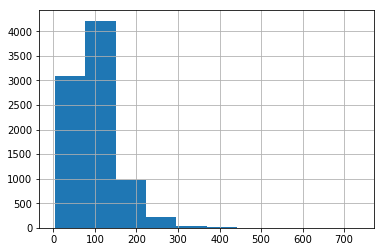

In [96]:
transaction_df.groupby('CIF_NO', as_index=False).agg({'AMT_TRX':'count'})['AMT_TRX'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E10BC02278>]],
      dtype=object)

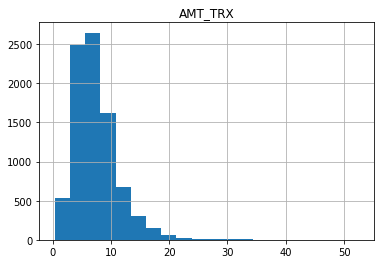

In [140]:
transaction_df['TRX_DATE'] = pd.to_datetime(transaction_df['TRX_DATE'])

transaction_df[['TRX_DATE','CIF_NO','AMT_TRX']]\
.groupby('CIF_NO')\
.resample('W', on='TRX_DATE')\
.count()[['AMT_TRX']]\
.reset_index().groupby(['CIF_NO']).mean().hist(bins=20)

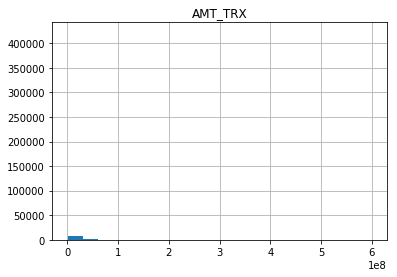

In [143]:
transaction_df[['TRX_DATE','CIF_NO','AMT_TRX']]\
.groupby('CIF_NO')\
.resample('D', on='TRX_DATE')\
.sum()[['AMT_TRX']]\
.reset_index().groupby(['CIF_NO']).mean().hist(bins=20)

transaction_df.groupby(['CIF_NO','TRX_DATE'], as_index=False).agg({'AMT_TRX':'count'})['AMT_TRX'].hist()